<a href="https://colab.research.google.com/github/UjjwalRana12/sentiment-analysis-lstm/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [ ]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential


In [ ]:


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
kaggel_dictionary=json.load(open('kaggle.json'))

In [ ]:
kaggel_dictionary.keys()

dict_keys(['username', 'key'])

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 97% 25.0M/25.7M [00:01<00:00, 25.4MB/s]
100% 25.7M/25.7M [00:01<00:00, 14.2MB/s]


In [ ]:
!ls

imdb-dataset-of-50k-movie-reviews.zip  kaggle.json  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/imdb-dataset-of-50k-movie-reviews.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
dataset=pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
dataset.shape

(50000, 2)

In [ ]:
dataset['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
dataset.isnull().sum()

,0
review,0
sentiment,0


In [ ]:

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

encoded_sentiment = enc.fit_transform(dataset[['sentiment']]).toarray()

encoded_df = pd.DataFrame(encoded_sentiment, columns=enc.get_feature_names_out(['sentiment']))

dataset = pd.concat([dataset, encoded_df], axis=1)

print(dataset.head())


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

   sentiment_negative  sentiment_positive  
0                 0.0                 1.0  
1                 0.0                 1.0  
2                 0.0                 1.0  
3                 1.0                 0.0  
4                 0.0                 1.0  


In [ ]:
dataset.head()

,review,sentiment,sentiment_negative,sentiment_positive
0,One of the other reviewers has mentioned that ...,positive,0.0,1.0
1,A wonderful little production. <br /><br />The...,positive,0.0,1.0
2,I thought this was a wonderful way to spend ti...,positive,0.0,1.0
3,Basically there's a family where a little boy ...,negative,1.0,0.0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.0,1.0


In [ ]:
dataset.drop(['sentiment','sentiment_negative'],axis=1,inplace=True)

In [ ]:
dataset

,review,sentiment_positive
0,One of the other reviewers has mentioned that ...,1.0
1,A wonderful little production. <br /><br />The...,1.0
2,I thought this was a wonderful way to spend ti...,1.0
3,Basically there's a family where a little boy ...,0.0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1.0
...,...,...
49995,I thought this movie did a down right good job...,1.0
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0.0
49997,I am a Catholic taught in parochial elementary...,0.0
49998,I'm going to have to disagree with the previou...,0.0


In [ ]:

dataset['sentiment_positive'] = dataset['sentiment_positive'].astype(int)


In [ ]:
dataset

,review,sentiment_positive
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:

dataset.to_csv('new_dataset.csv', index=False)


In [ ]:
data=pd.read_csv('new_dataset.csv')

In [ ]:
data['sentiment_positive'].value_counts()

,count
sentiment_positive,
1,25000
0,25000


In [ ]:
# prompt: import train test split

from sklearn.model_selection import train_test_split



In [ ]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42)

In [ ]:
train_data.shape

(40000, 2)

In [ ]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])
x_train= pad_sequences(tokenizer.texts_to_sequences(train_data['review']),maxlen=200)
x_test= pad_sequences(tokenizer.texts_to_sequences(test_data['review']),maxlen=200)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x_train[0]

array([1935,    1, 1200,    4, 2946, 3749, 1828,    2,  147,  144,    3,
        228,    4,    3,  207,  323,    2,  144, 1083,   16,   88,    4,
        132, 2871,   18,   10,  153,   99,    4,    1, 4020,  302,   11,
         17, 1001,   35,    1,  496,  492, 2619,  249,   71,   77,  107,
        107,  698,   60,   86, 1047, 1363,    5,  229,  132,   23, 4360,
         31,  138,  209, 1154,   14, 4501,   31,    3, 2386,    2,    8,
         11,    6,    3,  445,   14,  624,    4,    1,  718, 2959,    1,
       1278,    2,   71, 3616,    1,  166, 1507,    1, 1245,    5, 1629,
          1,  879, 1268,    5,    1,  310,  140, 2894,    2,  410,  633,
          7,    7,    1,  269,    6, 3553, 1000,    5,   26,   39,   14,
       1381,  217,   65,    2,   46,    6,   30,  219,   27,  193, 1484,
          8, 1101,   18,   10, 4905,   84,    1,  226,   66,  356,   68,
         54,   27,    5, 3600,   15,   44,   21,  192,    5,    3,  889,
       3511, 1758,   22,   25,    5,  158,  196,  1

In [ ]:
y_train=train_data['sentiment_positive']
y_test=test_data['sentiment_positive']


In [ ]:
y_train.shape

(40000,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

model = Sequential()

model.add(Embedding(input_dim=5000, output_dim=128, input_shape=(200,)))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 200, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 821,057 (3.13 MB)

 Trainable params: 821,057 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 200, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 821,057 (3.13 MB)

 Trainable params: 821,057 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.7214 - loss: 0.5249 - val_accuracy: 0.8530 - val_loss: 0.3551
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.8846 - loss: 0.2907 - val_accuracy: 0.8759 - val_loss: 0.3143
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9147 - loss: 0.2250 - val_accuracy: 0.8776 - val_loss: 0.2940
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9300 - loss: 0.1846 - val_accuracy: 0.8819 - val_loss: 0.2985
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9355 - loss: 0.1765 - val_accuracy: 0.8741 - val_loss: 0.3538
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9601 - loss: 0.1146 - val_accuracy: 0.8805 - val_loss: 0.3518


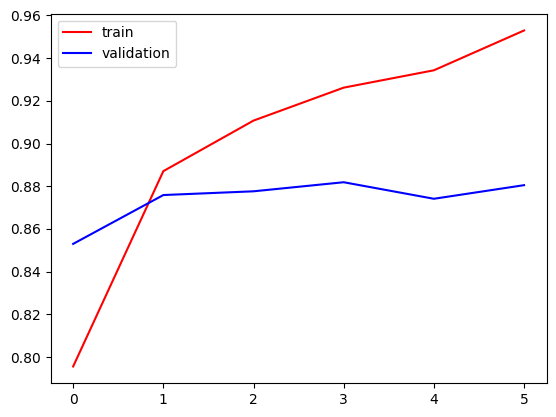

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8779 - loss: 0.3343


In [ ]:
print(f'loss:{loss}')
print(f'accuracy:{accuracy}')

loss:0.33595559000968933
accuracy:0.8820000290870667


In [ ]:
def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment


In [ ]:
new_review="the movie was marvelous but not that bad "
sentiment=predict_sentiment(new_review)
print(sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
negative


In [ ]:
new_review="the movie was not that good "
sentiment=predict_sentiment(new_review)
print(sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
negative


In [ ]:
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w') as f:
    f.write(tokenizer_json)